In [1]:
# importando as libs
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# light gbm como classificador

In [3]:
# importando o seaborn somente para usar umas bases de dados IRIS
import seaborn as sns

In [4]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# separando X e Y
X_iris = df_iris.drop(['species'], axis=1)
y_iris = df_iris['species']

In [6]:
# quebrando a base inteira em parcelas de treino e validacao
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state=42)

In [7]:
# lgbm como classificador

classificador_lgbm = lgb.LGBMClassifier()

In [8]:
# pra testar a acuracia do modelo, vamos realizar uma validacao cruzada
from sklearn.model_selection import cross_val_score


acuracia = 100 * cross_val_score(classificador_lgbm, X_iris_train, y_iris_train).mean()
print('acurácia: ', acuracia)

acurácia:  93.71541501976284


In [9]:
# lightgbm permite tunning de hiperparametros
# aqui por ex, vamos tentar tunar a maxima profundidade da arvore

classificador_lgbm_tunado = lgb.LGBMClassifier(max_depth=2)
acuracia_tunada = 100 * cross_val_score(classificador_lgbm_tunado, X_iris_train, y_iris_train).mean()
print('acurácia tunada: ', acuracia_tunada)

acurácia tunada:  93.71541501976284


In [10]:
# lightgbm permite tunning de hiperparametros
# aqui por ex, vamos trocar o boosting convencional por dart

classificador_lgbm_dart = lgb.LGBMClassifier(boosting_type='dart')
acuracia_tunada_dart = 100 * cross_val_score(classificador_lgbm_dart, X_iris_train, y_iris_train).mean()
print('acurácia tunada dart: ', acuracia_tunada_dart)

acurácia tunada dart:  93.71541501976284


In [11]:
## testamos tudo e definimos entao qual a melhor config possivel
# podemos entao utiliza-lo permanentemente daqui pra frente

classificador_final = lgb.LGBMClassifier()
classificador_final.fit(X_iris_train, y_iris_train)

LGBMClassifier()

In [12]:
# modelo ajustado, podemos agora fazer previsoes

predicoes_iris = classificador_final.predict(X_iris_test)
predicoes_iris[0:5] #mostrando so os 5 primeiros valores preditos

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [13]:
# como era na realidade os 5 primeiros preditos?
y_iris_test[0:5]

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

In [14]:
## parece que acertou bem, mas temos que verificar todos

acertos = (predicoes_iris == y_iris_test).sum()
total_testes = len(y_iris_test)

acuracia = 100*acertos/total_testes

print('percentual da taxa de acerto: ', acuracia)

percentual da taxa de acerto:  94.73684210526316


In [15]:
###################

In [16]:
# light gbm como regressor

In [17]:
## dados de milhas por galao
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
# separando X e Y
X_mpg = df_mpg.drop(['mpg', 'origin', 'name'], axis=1)
y_mpg = df_mpg['mpg']

In [19]:
# quebrando a base inteira em parcelas de treino e validacao
X_mpg_train, X_mpg_test, y_mpg_train, y_mpg_test = train_test_split(X_mpg, y_mpg, random_state=42)

In [20]:
## testando modelos e tunagens por validacao cruzada

In [21]:
# regressor lgbm puro
regressor_lgbm = lgb.LGBMRegressor()
cross_val_score(regressor_lgbm, X_mpg_train, y_mpg_train, scoring='neg_root_mean_squared_error').mean()

-3.0602968789895

In [22]:
# regressor lgbm com dart

regressor_lgbm_dart = lgb.LGBMRegressor(boosting_type='dart')

cross_val_score(regressor_lgbm_dart, X_mpg_train, y_mpg_train, scoring='neg_root_mean_squared_error').mean()

-3.8958190536698334

In [23]:
# regressor lgbm com outra profundidade

regressor_lgbm_tunado = lgb.LGBMRegressor(max_depth=2)

cross_val_score(regressor_lgbm_tunado, X_mpg_train, y_mpg_train, scoring='neg_root_mean_squared_error').mean()

-3.085218235455716

In [24]:
## menor erro foi lgbm puro
# ele será o campeao e será utilizado daqui em diante
# podemos ajusta-lo (fit) com todos os dados de treino agora

regressor_campeao = lgb.LGBMRegressor()
regressor_campeao.fit(X_mpg_train, y_mpg_train, eval_metric='neg_root_mean_squared_error')

LGBMRegressor()

In [25]:
# predizendo valores com a parcela de teste
predicoes_mpg = regressor_campeao.predict(X_mpg_test)

#olhando os 5 primeiros previstos
predicoes_mpg[0:5]

array([32.62089047, 30.47819635, 21.1453571 , 15.63407173, 13.12103143])

In [26]:
# observando os valores reais dos 5 primeiros 
y_mpg_test[0:5]

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
Name: mpg, dtype: float64

In [27]:
## erro final desse teste

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_mpg_test, predicoes_mpg)
rmse = math.sqrt(mse)

print('erro: ',rmse)

erro:  2.526606943873821


_______________________________

________________________________________________________________________

In [28]:
# regressão por quartil com lgbm

Para tarefas de regressão, nem sempre buscamos apenas uma estimativa absolutamente precisa. Por isso, em vez de procurar uma precisão absoluta, algumas vezes é necessário um intervalo de previsão, nesses casos podemos utilizar a regressão de quantis - que prevejam uma estimativa de intervalo do nosso alvo.

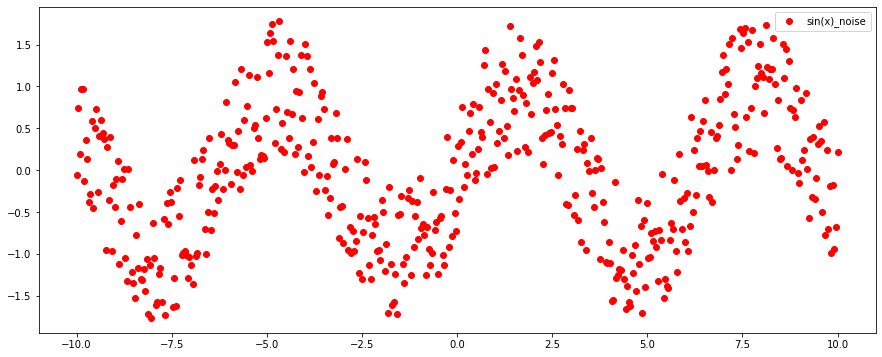

In [57]:
import matplotlib.pyplot as plt

#criamos aqui um sinal, baseado em sin(x) 
# o melhor fit possível seria o proprio sin(x), mas podemos querer uma estimativa levemente mais alta ou levemente mais baixa
# ai os qratis podem vir em nosso socorro

sample_size = 500
x = np.linspace(-10, 10, sample_size)
y = np.sin(x)
y_noise = y + np.random.uniform(-0.8, 0.8, sample_size)

plt.figure(figsize=[15, 6])
#plt.plot(x, y, label='sin(x)')
plt.scatter(x, y_noise, label='sin(x)_noise', color='red')
plt.legend()

In [58]:
# adaptando a entrada de dados, usando x o proprio linspace porem girado 
# e o y o ruido que parece um seno 
x_train, y = x.reshape(-1, 1), y_noise

In [59]:
# criando 3 modelos para três quartis diferentes 0.1, 0.5 e 0.8

# para previsão de quartis elevados, espera-se um valor de previsão mais elevado
# vice-versa para previsão de quartis baixos.

regressor_quartil_1 = lgb.LGBMRegressor(alpha=0.1, objective='quantile', metric='quantile')
regressor_quartil_5 = lgb.LGBMRegressor(alpha=0.5, objective='quantile', metric='quantile')
regressor_quartil_8 = lgb.LGBMRegressor(alpha=0.8, objective='quantile', metric='quantile')

In [64]:
# calibrando
regressor_quartil_1.fit(x_train, y)
regressor_quartil_5.fit(x_train, y)
regressor_quartil_8.fit(x_train, y)

LGBMRegressor(alpha=0.8, metric='quantile', objective='quantile')

In [65]:
# predizendo valores 
predicoes_quartil_1 = regressor_quartil_1.predict(x_train)
predicoes_quartil_5 = regressor_quartil_5.predict(x_train)
predicoes_quartil_8 = regressor_quartil_8.predict(x_train)

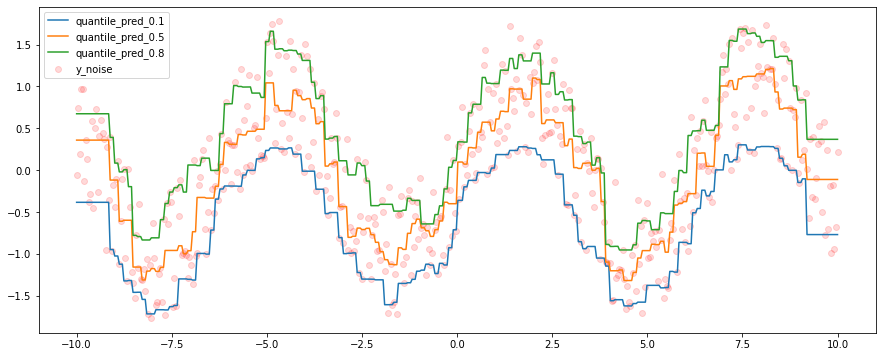

In [66]:
# data viz
plt.figure(figsize=[15, 6])

plt.scatter(x, y_noise, label='y_noise', color='red', alpha=0.15)
plt.plot(x, predicoes_quartil_1, label='quantile_pred_0.1')
plt.plot(x, predicoes_quartil_5, label='quantile_pred_0.5')
plt.plot(x, predicoes_quartil_8, label='quantile_pred_0.8')
plt.legend()